In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

In [24]:
def convolve(image, kernel):
    """
    Apply convolution operation between image and kernel.
    """
    img_h, img_w = image.shape
    k_size = kernel.shape[0]
    pad = k_size // 2
    padded_img = np.pad(image, pad, mode='constant')
    output = np.zeros(image.shape)

    # Properly indented loop
    for y in range(img_h):
        for x in range(img_w):
            region = padded_img[y:y+k_size, x:x+k_size]
            output[y, x] = np.sum(region * kernel)
    return output


In [25]:
# Upload image through Colab interface
uploaded = files.upload()
image_name = list(uploaded.keys())[0]


Saving Canny-edge-detection-applied-to-a-sample-image-a-Original-image-b-Detected-edges.png to Canny-edge-detection-applied-to-a-sample-image-a-Original-image-b-Detected-edges.png


In [26]:
# Load and process image
original_img = Image.open(image_name).convert('L')  # Convert to grayscale
img_array = np.array(original_img, dtype=np.float32)

In [27]:
# Sobel operators
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)


In [28]:
# Apply Sobel filters
gradient_x = convolve(img_array, sobel_x)
gradient_y = convolve(img_array, sobel_y)

In [29]:
# Calculate magnitude and normalize
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)


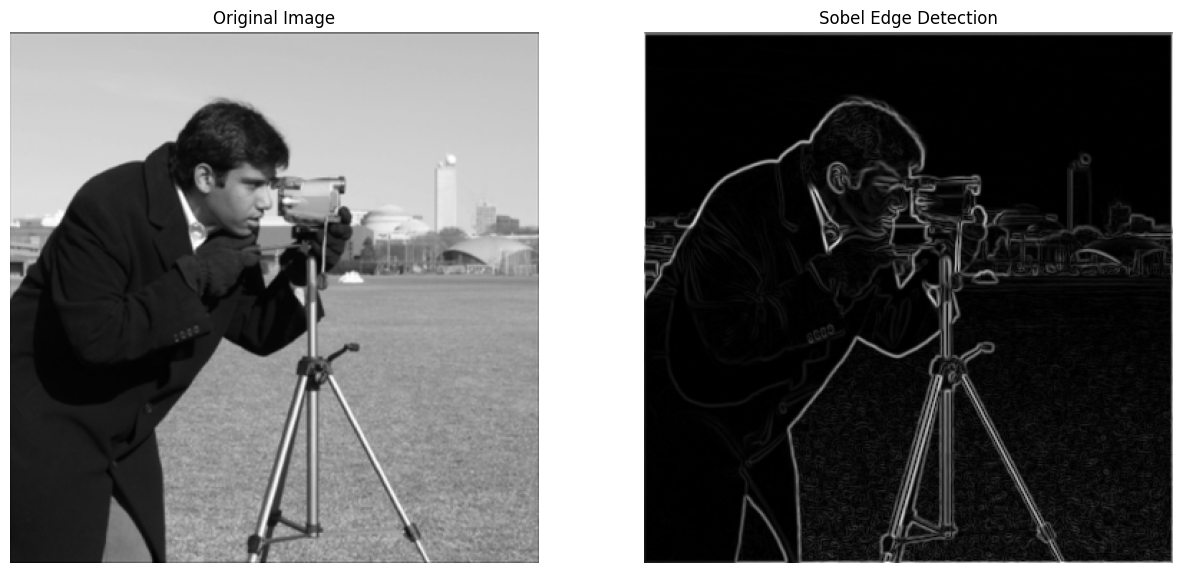

In [30]:
# Display results
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()